### Exploratory Data Analysis 
##### Working with Titanic dataset from the "Titanic: Machine Learning from Disaster" competition from Kaggle. Dataset is in the public domain (https://www.kaggle.com/c/titanic)

This is a typical dataset and we can learn how to perform logistic regression to predict whether a passenger survived or not during the ill-fated voyage of the Titanic.

NOTE: This is a somewhat cleaned version of the titanic dataset. If you download the dataset directly from Kaggle, it may be necessary to perform some cleaning during your data analysis not covered in this demo.

In [1]:
# numpy the fundamental pkg for scientific computing with Python & includes linear algebra class
import numpy as np 

# pandas library provides hi-perf data structures and data analysis tools for Python
import pandas as pd 

# matplotlib is a fundamental 2D plotting library for Python 
# seaborn is a powerful and useful data visualization library based on matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns

In [2]:
# import the data sets from local file system in Pandas DataFrame
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [3]:
# for this demo, we work with the training DataFrame exclusively
# info() prints a concise summary of a DataFrame
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


##### Here is a summary of the features in this dataset
survival:    survival status<br>
PassengerId: unique passenger id<br> 
pclass:      ticket class<br>
sex:         sex<br>
Age:         age<br>
sibsp:       # siblings/spouses on board<br>
parch:       # parents/children on board<br>
ticket:      ticket#<br>
fare:        passenger fare<br>
cabin:       cabin#<br>
embarked:    embarkation port<br>

In [4]:
# describe() shows a quick statistic summary of the data
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# head(n) displays the top n rows of the data
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
# extract a subset of the data from a DataFrame to display multiple columns, rows
train_df[['Survived','Pclass','Sex','Age']][0:5]

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [7]:
# I use value_counts() to determine the frequency of the values present in one particular column
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
# with normalize=True, the object returned contains the relative 
# frequencies of unique values (* 100 to get %ge)
round(train_df['Survived'].value_counts(normalize=True) * 100,2)

0    61.62
1    38.38
Name: Survived, dtype: float64

In [9]:
# crosstab() computes a simple cross-tabulation of two (or more) factors
pd.crosstab(train_df.Sex, train_df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [10]:
# using isnull(), sum(), sort_values(), count() to get the total missing values and % missing for the features
# I am using sort_values() and head() on the output because I don't need to see all features, many have no missing values
total_missing = train_df.isnull().sum().sort_values(ascending=False)
col_pct_missing = round(train_df.isnull().sum()/train_df.isnull().count()*100, 1).sort_values(ascending=False)
missing_data = pd.concat([total_missing, col_pct_missing], axis=1, keys=['Total Missing', '% Missing'])
missing_data.head(7)

,Total Missing,% Missing
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0


In [11]:
# let's see all the columns (features) again
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

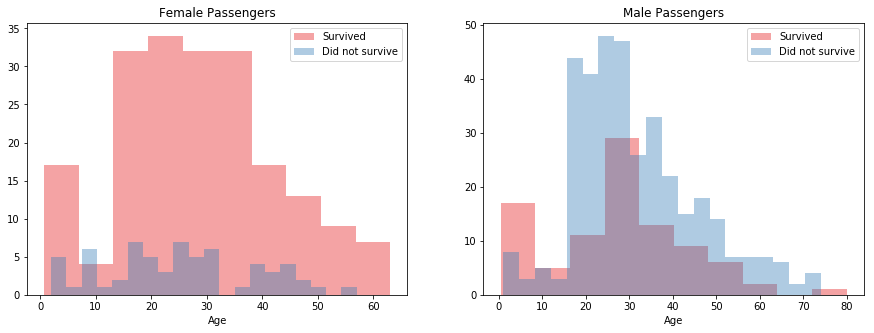

In [12]:
# a nice pair of histograms to examine the binned ages of the different sexes that did and did not survive
sns.set_palette("Set1")
yes = 'Survived'
no  = 'Did not survive'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
# if you want to run this after remapping sex male,female-> 0,1 uncomment these lines
#women = train_df[train_df['Sex']==1]
#men = train_df[train_df['Sex']==0]
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=10, label = yes, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=20, label = no, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female Passengers')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=10, label = yes, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=20, label = no, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male Passengers')

In [13]:
# now remap the sex feature to binary value 0 for male, 1 for female 
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [14]:
# we can drop the Cabin feature as it provides us with little insight, it just has too many missing values
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [15]:
# now let's get another summary of the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(3)
memory usage: 76.6+ KB


In [16]:
# fixing Embarked, fill the two missing values with the most common feature value
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [17]:
# fixing the Age feature is a little more involved... let's take both datasets
df = [train_df, test_df]

for dataset in df:
    # for each dataset, generate an array of random ages using randint() 
    # returns random integers from low (mean - std) to high (mean + std)
    mean_age = train_df["Age"].mean()
    std_age = train_df["Age"].std()
    num_missing = dataset["Age"].isnull().sum()
    low = mean_age - std_age
    high = mean_age + std_age
    random_age = np.random.randint(low, high, size = num_missing)

    # where there are missing values in Age column, replace them with random age
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = random_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

print("# missing from Age column:",train_df["Age"].isnull().sum())

# missing from Age column: 0


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(1), int32(1), int64(6), object(3)
memory usage: 73.2+ KB


In [19]:
train_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.222222,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.567724,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200
